In this notebook you will find the prediction we obtained using the library pyts and the model Series time forest. you will find different sections:
- load data and necessary packages
- a section helpers with the functions to run the notebook
- a third section where we select the best hyperparameters for each brain area
- calculation of the accuracy obtained with the selected hyperparameters and box plots graph of the results
- same graph done with box plots but using error - bar
- two section where we tune the hyperparameters separately on the stimulus amplitude 2 and 3 to see if this could be a benefit 
- we then then calculate the accuracies obtained with this second set of hyperparameters and plot the result obtained using error bars, in the subsequent session we plot the graphs for different pre-stimulus time intervals.
- in the last session of this notebook it's possible to find the calculated accuracies for each session at pre-stimulus time 1.5 s and the graph obtained from it

#Load data and necessary packages


In [1]:
from google.colab import drive #we connect the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/johannfaouzi/pyts.git #we import all the necessary packages
!pip install pyts
from pathlib import Path
import pandas as pd
!cp '/content/drive/MyDrive/ML projet/create_dataset.py' './'
!cp '/content/drive/MyDrive/ML projet/load_data.py' './'
import create_dataset
from create_dataset import * 
import load_data
from load_data import *
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

Cloning into 'pyts'...
remote: Enumerating objects: 3366, done.
remote: Counting objects: 100% (315/315), done.
remote: Compressing objects: 100% (239/239), done.
remote: Total 3366 (delta 156), reused 142 (delta 75), pack-reused 3051
Receiving objects: 100% (3366/3366), 7.68 MiB | 21.73 MiB/s, done.
Resolving deltas: 100% (1875/1875), done.
     |████████████████████████████████| 2.5 MB 8.9 MB/s 


In [4]:
ml_folder = Path('/content/drive/MyDrive/ML projet') #we load the dataset
ml_folder.exists()
data_path = ml_folder/'DataLFP.mat'

#Helpers

In [5]:
from pyts.preprocessing import RobustScaler #we define all the function that will be useful in the future, robust scaler from pyts
def robust_scale(X):
  scaler1 = RobustScaler()
  X_new=scaler1.transform(X)
  return X_new

In [6]:
from pyts.preprocessing import StandardScaler
def normal_scale(X):
  scaler = StandardScaler()
  X_new=scaler.transform(X)
  return X_new

In [7]:
from pyts.classification import TimeSeriesForest #we load the model we will use from a phyton library pyts


In [8]:
def random_forest_classification(X,y, clf0): #we create a model that gives us the accuracy of the prediction once we imput the dataset a
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
  clf0.fit(X_train, y_train)
  print('accuracy--', clf0.score(X_test, y_test))
  y_pred=clf0.predict(X_test)
  return clf0.score(X_test, y_test)

In [48]:
def complete_model(data_path, time, clf0, clf2, clf3, clf, area): #this model allows you to do cross validation on the prediction, it is
# possible to use different classifier depending on the amplitude of the stimulus you choose to use or if you put them together for the prediction. It outputs the 
#accuracies respective considered stimulus 2 and 3 together with an added feature indicating the amplitude, stimulus 2 and stimulus 3 separately and stimulus 2 and 3 together
   print('**********************************')
   print( 'time ',time)
   X2,y2=preprocess_dataset(data_path, area, start=time, select_amplitude=[2])
   X3,y3=preprocess_dataset(data_path, area, start=time, select_amplitude=[3])
   dim2=np.shape(X2)[0]
   dim3=np.shape(X3)[0]
   X2_tot=np.hstack((2*np.ones((dim2,1)), X2))
   X3_tot=np.hstack((3*np.ones((dim3,1)), X3))
   X=np.vstack((X2_tot, X3_tot))
   y=np.hstack((y2,y3))
   X=robust_scale(X)
   print('dimesione dataset used for added feature', y.shape)
   print('accuracy with added feature')
   accuracy=mean_CVrandom_forest_classification(X,y, clf0)
   print('dimesion dataset used', y2.shape,' accuracy stimulus 2')
   acc2=mean_CVrandom_forest_classification(X2,y2, clf2)
   print('accuracy stimulus 3')
   print('dimesion dataset used', y3.shape,' accuracy stimulus 3')
   acc3=mean_CVrandom_forest_classification(X3,y3, clf3)
   X0, y0=preprocess_dataset(data_path, area, start=time,select_amplitude=[2,3])
   print('dimension dataset used', y0.shape, 'accuracy without added feature')
   acc0=mean_CVrandom_forest_classification(X0,y0, clf)

   
   
   return accuracy, acc2, acc3, acc0

In [47]:
def copy_complete_model(data_path, time, clf, area): #this model does the same thing as the one above outputting the accuracy on the dataset but in this case the classifier used is always the same
   print('**********************************')
   print( 'time ',time)
   X2,y2=preprocess_dataset(data_path, area, start=time, select_amplitude=[2])
   X3,y3=preprocess_dataset(data_path, area, start=time, select_amplitude=[3])
   dim2=np.shape(X2)[0]
   dim3=np.shape(X3)[0]
   X2_tot=np.hstack((2*np.ones((dim2,1)), X2))
   X3_tot=np.hstack((3*np.ones((dim3,1)), X3))
   X=np.vstack((X2_tot, X3_tot))
   y=np.hstack((y2,y3))
   X=robust_scale(X)
   print('dimesione dataset used for added feature', y.shape)
   print('accuracy with added feature')
   accuracy=CVrandom_forest_classification(X,y, clf)
   print('dimesion dataset used', y2.shape,' accuracy stimulus 2')
   acc2=CVrandom_forest_classification(X2,y2, clf)
   print('accuracy stimulus 3')
   print('dimesion dataset used', y3.shape,' accuracy stimulus 3')
   acc3=CVrandom_forest_classification(X3,y3, clf)
   X0, y0=preprocess_dataset(data_path, area, start=time,select_amplitude=[2,3])
   print('dimension dataset used', y0.shape, 'accuracy without added feature')
   acc0=CVrandom_forest_classification(X0,y0, clf)

   
   
   return accuracy, acc2, acc3, acc0

In [11]:

def CVrandom_forest_classification(X,y, clf0): #this model allows you to do cross validation prediction once you imput the classifier and the dataset, it returns the accuracies obtained
    kfold = KFold(n_splits=10,shuffle=True ) # k=10, split the data into 10 equal parts
    result_lr=cross_val_score(clf0,X,y,cv=10,scoring='accuracy')
    print('The cross validated score is:',round(result_lr.mean(),4), 'the crossvalidation standard deviation is ', round(result_lr.std(),4))
    y_pred = cross_val_predict(clf0,X,y,cv=10)
    return result_lr*100

In [46]:
def mean_CVrandom_forest_classification(X,y, clf0): #this model allows you to do cross validation prediction once you imput the classifier and the dataset, it returns the accuracies obtained
    kfold = KFold(n_splits=10,shuffle=True ) # k=10, split the data into 10 equal parts
    result_lr=cross_val_score(clf0,X,y,cv=10,scoring='accuracy')
    print('The cross validated score is:',round(result_lr.mean(),4), 'the crossvalidation standard deviation is ', round(result_lr.std(),4))
    y_pred = cross_val_predict(clf0,X,y,cv=10)
    return round(result_lr.mean()*100,2), round(result_lr.std()*100,2)

In [15]:
 def model(data_path, session, time, clf, area): #this function is used to make predictions on a single session, it returns the accuracy and it print the confusion matrix
   #takes as imput the data path of the dataset, the session we want to analyze, the time before the stimulus analyzed, the classifier, and the area
   print('**********************************')
   print('session ', session, 'time ',time)
   X2,y2=preprocess_dataset_with_session(data_path, area, start=time, select_amplitude=[2])[session]
   X3,y3=preprocess_dataset_with_session(data_path, area, start=time, select_amplitude=[3])[session]
   Xa, ya=preprocess_dataset_with_session(data_path, area, start=time, select_amplitude=[2,3])[session]
   dim2=np.shape(X2)[0]
   dim3=np.shape(X3)[0]
   X2_tot=np.hstack((2*np.ones((dim2,1)), X2))
   X3_tot=np.hstack((3*np.ones((dim3,1)), X3))
   X=np.vstack((X2_tot, X3_tot))
   y=np.hstack((y2,y3))
   accuracy, y_test, y_pred=random_forest_classification(X,y, clf)
   ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
   plt.show()
   
   return accuracy

In [62]:
 def model_CV(data_path, session, time, clf0, clf1, clf2, clf3, area):#this model does the same thing as the one above but it does also cross validation and it can take as imput different classfier 
 #to use different classifier depending on the stimulus used, and if you put them together or not
   print('**********************************')
   print('session ', session, 'time ',time)
   X2,y2=preprocess_dataset_with_session(data_path, area, start=time, select_amplitude=[2])[session]
   X3,y3=preprocess_dataset_with_session(data_path, area, start=time, select_amplitude=[3])[session]
   Xa, ya=preprocess_dataset_with_session(data_path, area, start=time, select_amplitude=[2,3])[session]
   dim2=np.shape(X2)[0]
   dim3=np.shape(X3)[0]
   X2_tot=np.hstack((2*np.ones((dim2,1)), X2))
   X3_tot=np.hstack((3*np.ones((dim3,1)), X3))
   X=np.vstack((X2_tot, X3_tot))
   y=np.hstack((y2,y3))
   print('added feature')
   accuracy=mean_CVrandom_forest_classification(X,y, clf0)
   print('stimulus 2')
   accuracy2=mean_CVrandom_forest_classification(X2,y2, clf1)
   print('stimulus 3')
   accuracy3=mean_CVrandom_forest_classification(X3,y3, clf2)
   print('accuracy per session stim 2 and 3 together')
   acc=mean_CVrandom_forest_classification(Xa,ya, clf3)
   return accuracy, accuracy2, accuracy3, acc

In [ ]:
#times analized
times=np.array([0.5, 1.5, 2.5])
areas=['wS1', 'mPFC', 'tjM1']

# Selection of the best hyperparameters on each brain area

In [ ]:
clf0=TimeSeriesForest(random_state=43) #here we do a grid search using cross validation to find the best hyperparameters for the mPFC brain area
#the parameters that are tuned are the number of estimators, the number of windows, the maximum depth of the tree (TimesSeriesForest 
#fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting)
#here we consider stimulus 2 and 3 together for the tuning of the parameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
areas=['wS1', 'mPFC', 'tjM1']
times=[0.5, 1.5, 2.5]
windows=np.array([1,3,5,7,9])
estim=np.array([100,200,300,400,600, 700,900])
depth=np.array([2,4,6,10,15])
X_mPFC,y_mPFC=preprocess_dataset(data_path, 'mPFC', start=2.5, select_amplitude=[2,3])
X_train, X_test, y_train, y_test = train_test_split(X_mPFC, y_mPFC, test_size=0.2, random_state=0)
tuned_parameters = {"n_estimators": [100,200,300,400,600, 700,900], "n_windows":[1,3,5,7,9] , "max_depth": [2,4,6,10,15]}

clf = GridSearchCV(clf0, tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
print("best score: ", clf.best_score_ )

Best parameters set found on development set:

{'max_depth': 10, 'n_estimators': 700, 'n_windows': 9}

Grid scores on development set:

0.458 (+/-0.065) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 1}
0.477 (+/-0.043) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 3}
0.482 (+/-0.057) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 5}
0.498 (+/-0.057) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 7}
0.487 (+/-0.034) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 9}
0.470 (+/-0.025) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 1}
0.483 (+/-0.048) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 3}
0.480 (+/-0.050) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 5}
0.504 (+/-0.065) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 7}
0.497 (+/-0.057) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 9}
0.469 (+/-0.034) for {'max_depth': 2, 'n_estimators': 300, 'n_windows': 1}
0.473 (+/-0.053) for {'max_depth': 2, '

In [ ]:
clf0=TimeSeriesForest(random_state=43) #we do the same thing on the brain area ws1 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
areas=['wS1', 'mPFC', 'tjM1']
times=[0.5, 1.5, 2.5]
windows=np.array([1,3,5,7,9])
estim=np.array([100,200,300,400,600, 700,900])
depth=np.array([2,4,6,10,15])
X_ws1,y_ws1=preprocess_dataset(data_path, 'wS1', start=2.5, select_amplitude=[2,3])
X_train, X_test, y_train, y_test = train_test_split(X_ws1, y_ws1, test_size=0.2, random_state=0)
tuned_parameters = {"n_estimators": [100,200,300,400,600, 700,900], "n_windows":[1,3,5,7,9] , "max_depth": [2,4,6,10,15]}

clf = GridSearchCV(clf0, tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
print("best score: ", clf.best_score_ )

Best parameters set found on development set:

{'max_depth': 2, 'n_estimators': 900, 'n_windows': 7}

Grid scores on development set:

0.508 (+/-0.049) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 1}
0.508 (+/-0.020) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 3}
0.501 (+/-0.037) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 5}
0.514 (+/-0.051) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 7}
0.515 (+/-0.032) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 9}
0.500 (+/-0.054) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 1}
0.513 (+/-0.013) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 3}
0.507 (+/-0.047) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 5}
0.515 (+/-0.051) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 7}
0.503 (+/-0.027) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 9}
0.491 (+/-0.060) for {'max_depth': 2, 'n_estimators': 300, 'n_windows': 1}
0.510 (+/-0.017) for {'max_depth': 2, 'n

In [ ]:
clf0=TimeSeriesForest(random_state=43) #in the same way we tune the hyperparameters for the brain area tjM1
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
areas=['wS1', 'mPFC', 'tjM1']
times=[0.5, 1.5, 2.5]
windows=np.array([1,3,5,7,9])
estim=np.array([100,200,300,400,600, 700,900])
depth=np.array([2,4,6,10,15])
X_tjM1,y_tjM1=preprocess_dataset(data_path, 'tjM1', start=2.5, select_amplitude=[2,3])
X_train, X_test, y_train, y_test = train_test_split(X_tjM1, y_tjM1, test_size=0.2, random_state=0)
tuned_parameters = {"n_estimators": [100,200,300,400,600, 700,900], "n_windows":[1,3,5,7,9] , "max_depth": [2,4,6,10,15]}

clf = GridSearchCV(clf0, tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
print("best score: ", clf.best_score_ )

Best parameters set found on development set:

{'max_depth': 6, 'n_estimators': 100, 'n_windows': 7}

Grid scores on development set:

0.495 (+/-0.077) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 1}
0.516 (+/-0.087) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 3}
0.523 (+/-0.044) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 5}
0.533 (+/-0.096) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 7}
0.529 (+/-0.069) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 9}
0.503 (+/-0.058) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 1}
0.510 (+/-0.129) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 3}
0.529 (+/-0.063) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 5}
0.533 (+/-0.120) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 7}
0.531 (+/-0.040) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 9}
0.497 (+/-0.044) for {'max_depth': 2, 'n_estimators': 300, 'n_windows': 1}
0.492 (+/-0.125) for {'max_depth': 2, 'n

In [17]:
clf_ws1=TimeSeriesForest(n_estimators=900, n_windows=7, random_state=43, max_depth=2) #we define the best classifier found for each area
clf_tjM1=TimeSeriesForest(n_estimators=100, n_windows=7, random_state=43, max_depth=6)
clf_mPFC=TimeSeriesForest(n_estimators=700, n_windows=9, random_state=43, max_depth=10)

# Calculation of the accuracies obtained with the selected hyperparameters and boxplots of the result 

In [18]:
times=np.array([0.5, 1.5, 2.5]) #we do some predictions considering different pre-stimulus time intervals on the signal coming from ws1, we use cross validation to evaluate the stability of the prediction 
#the printed values are the mean accuracies and their standard deviation obtained for each time interval and stimulus, in the 4 arrays below we can find all the accuracies found for each fold of cross validation
# at the different times interval
acc_mod_ws1=np.zeros((3,10)) #accuracies obtained when considering together the stimulus amplitude 2 and 3 and adding an additional feature to label the stimulus amplitude
acc2_ws1=np.zeros((3,10)) #accuracies obtained with the recorded data when stimulus amplitude =2
acc3_ws1=np.zeros((3,10)) # #accuracies obtained with the recorded data when stimulus amplitude =3
acc_ws1=np.zeros((3,10)) # #accuracies obtained with the recorded data when stimulus amplitude was 2 and 3, in this case we didn't add the additional feature because we wanted to discover if 
#the stimulus amplitude was a determining factor
for t in range(len(times)):
  acc_mod_ws1[t,:], acc2_ws1[t,:], acc3_ws1[t,:], acc_ws1[t,:]=copy_complete_model(data_path,times[t] , clf_ws1, 'wS1')

**********************************
time  0.5
dimesione dataset used for added feature (1658,)
accuracy with added feature
The cross validated score is: 0.4952 the crossvalidation standard deviation is  0.0207
dimesion dataset used (780,)  accuracy stimulus 2
The cross validated score is: 0.5333 the crossvalidation standard deviation is  0.0434
accuracy stimulus 3
dimesion dataset used (878,)  accuracy stimulus 3
The cross validated score is: 0.5125 the crossvalidation standard deviation is  0.0409
dimension dataset used (1808,) accuracy without added feature
The cross validated score is: 0.5039 the crossvalidation standard deviation is  0.0177
**********************************
time  1.5
dimesione dataset used for added feature (1658,)
accuracy with added feature
The cross validated score is: 0.5193 the crossvalidation standard deviation is  0.0243
dimesion dataset used (780,)  accuracy stimulus 2
The cross validated score is: 0.4795 the crossvalidation standard deviation is  0.0484
ac

In [19]:
#we transform the results obtained in the arrays above in a pandas Dataframe to be able to do a box plot
results_time0 = pd.DataFrame(columns=['area', 'stimulus', 'accuracy']) #all the result signal considered for time 0.5 before the stimulus across different areas for stimulus 2 and 3
results_time1=pd.DataFrame(columns=['area', 'stimulus', 'accuracy']) #all the results signal considered for time 1.5 before the stimulus across different areas for stimulus 2 and 3
results_time2=pd.DataFrame(columns=['area', 'stimulus', 'accuracy']) #all the result signal considered for time interval of 2.5s before the stimulus across different areas for stimulus 2 and 3
tot_result_ws1=pd.DataFrame(columns=['time', 'stimulus', 'accuracy']) #takes all the result for the ws1 brain, considering the different time intervals taken before the stimulus and the stimulus amplitude

areas=['ws1', 'mPFC', 'tjM1']
for acc in acc2_ws1[0,:]:
  results_time0 = results_time0.append({'area' : areas[0], 'stimulus' :2, 'accuracy' : acc}, ignore_index=True)
  tot_result_ws1=tot_result_ws1.append({'time':0.5, 'stimulus':2, 'accuracy':acc}, ignore_index=True)
for acc in acc3_ws1[0,:]:
  results_time0=results_time0.append({'area':areas[0], 'stimulus':3, 'accuracy':acc}, ignore_index=True)
  tot_result_ws1=tot_result_ws1.append({'time':0.5, 'stimulus':3, 'accuracy':acc}, ignore_index=True)
for acc in acc2_ws1[1,:]:
  results_time1 = results_time1.append({'area' : areas[0], 'stimulus' :2, 'accuracy' : acc}, ignore_index=True)
  tot_result_ws1=tot_result_ws1.append({'time':1.5, 'stimulus':2, 'accuracy':acc}, ignore_index=True)
for acc in acc3_ws1[1,:]:
  results_time1=results_time1.append({'area':areas[0], 'stimulus':3, 'accuracy':acc}, ignore_index=True)
  tot_result_ws1=tot_result_ws1.append({'time':1.5, 'stimulus':3, 'accuracy':acc}, ignore_index=True)
for acc in acc2_ws1[2,:]:
  results_time2 = results_time2.append({'area' : areas[0], 'stimulus' :2, 'accuracy' : acc}, ignore_index=True)
  tot_result_ws1=tot_result_ws1.append({'time':2.5, 'stimulus':2, 'accuracy':acc}, ignore_index=True)
for acc in acc3_ws1[2,:]:
  results_time2=results_time2.append({'area':areas[0], 'stimulus':3, 'accuracy':acc}, ignore_index=True)
  tot_result_ws1=tot_result_ws1.append({'time':2.5, 'stimulus':3, 'accuracy':acc}, ignore_index=True)
for acc in acc_ws1[0,:]:
  tot_result_ws1=tot_result_ws1.append({'time':0.5, 'stimulus':'2 and 3', 'accuracy':acc}, ignore_index=True)
for acc in acc_ws1[1,:]:
  tot_result_ws1=tot_result_ws1.append({'time':1.5, 'stimulus':'2 and 3', 'accuracy':acc}, ignore_index=True)
for acc in acc_ws1[2,:]:
  tot_result_ws1=tot_result_ws1.append({'time':2.5, 'stimulus':'2 and 3', 'accuracy':acc}, ignore_index=True)
for acc in acc_mod_ws1[0,:]:
  tot_result_ws1=tot_result_ws1.append({'time':0.5, 'stimulus':'2 and 3 added feature', 'accuracy':acc}, ignore_index=True)
for acc in acc_mod_ws1[1,:]:
  tot_result_ws1=tot_result_ws1.append({'time':1.5, 'stimulus':'2 and 3 added feature', 'accuracy':acc}, ignore_index=True)
for acc in acc_mod_ws1[2,:]:
  tot_result_ws1=tot_result_ws1.append({'time':2.5, 'stimulus':'2 and 3 added feature', 'accuracy':acc}, ignore_index=True)





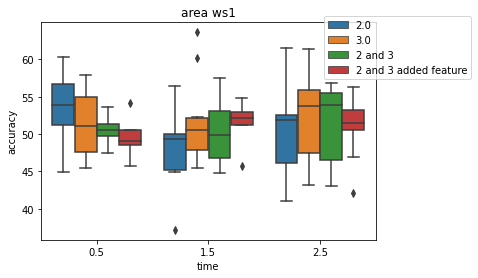

In [ ]:
sns.boxplot(x="time", y="accuracy", hue="stimulus", data=tot_result_ws1) #we create a box plot considering all the stimulus used (2, 3, 2 and 3 together, 2 and 3 + added feature) to compare the results across different time intervals
plt.title('area ws1')
plt.legend(loc=1,bbox_to_anchor=(1.05, 0.8, 0.25, 0.25))

In [20]:
#we re-do the same thing as before, considering in this case the brain area mPFC
times=np.array([0.5, 1.5, 2.5]) #pre-stimulus time considered
acc_mod_mPFC=np.zeros((3,10)) #it will contain all the accuracies when we consider stimulus 2 and 3 together with the added feature across different pre-stimulus time intervals
acc2_mPFC=np.zeros((3,10)) #it will contain all the accuracies when we consider stimulus 2 across different pre-stimulus time intervals
acc3_mPFC=np.zeros((3,10)) #it will contain all the accuracies when we consider stimulus 3 
acc_mPFC=np.zeros((3,10)) ##it will contain all the accuracies when we consider stimulus 2 and 3 together with the added feature across different pre-stimulus time intervals
for t in range(len(times)):
  acc_mod_mPFC[t,:], acc2_mPFC[t,:], acc3_mPFC[t,:], acc_mPFC[t,:]=copy_complete_model(data_path,times[t] , clf_mPFC, 'mPFC') 
#the printed values are the mean accuracies and their standard deviation for each time interval and stimulus characteristic

**********************************
time  0.5
dimesione dataset used for added feature (1146,)
accuracy with added feature
The cross validated score is: 0.5384 the crossvalidation standard deviation is  0.0632
dimesion dataset used (584,)  accuracy stimulus 2
The cross validated score is: 0.5222 the crossvalidation standard deviation is  0.0477
accuracy stimulus 3
dimesion dataset used (562,)  accuracy stimulus 3
The cross validated score is: 0.5195 the crossvalidation standard deviation is  0.0606
dimension dataset used (1292,) accuracy without added feature
The cross validated score is: 0.4992 the crossvalidation standard deviation is  0.0409
**********************************
time  1.5
dimesione dataset used for added feature (1146,)
accuracy with added feature
The cross validated score is: 0.486 the crossvalidation standard deviation is  0.0373
dimesion dataset used (584,)  accuracy stimulus 2
The cross validated score is: 0.5066 the crossvalidation standard deviation is  0.0592
acc

In [21]:
tot_results_mPFC=pd.DataFrame(columns=['time', 'stimulus', 'accuracy']) #as before we transform all the result in a Pandas Dataframe, this Dataframe in particular contains all the results for mPFC brain area 
#for different prestimulus time intervals and stimulus characteristcs
for acc in acc2_mPFC[0,:]:
  results_time0 = results_time0.append({'area' : areas[1], 'stimulus' :2, 'accuracy' : acc}, ignore_index=True)
  tot_results_mPFC=tot_results_mPFC.append({'time':0.5, 'stimulus':2, 'accuracy':acc}, ignore_index=True)
for acc in acc3_mPFC[0,:]:
  results_time0=results_time0.append({'area':areas[1], 'stimulus':3, 'accuracy':acc}, ignore_index=True)
  tot_results_mPFC=tot_results_mPFC.append({'time':0.5, 'stimulus':3, 'accuracy':acc}, ignore_index=True)
for acc in acc2_mPFC[1,:]:
  results_time1 = results_time1.append({'area' : areas[1], 'stimulus' :2, 'accuracy' : acc}, ignore_index=True)
  tot_results_mPFC=tot_results_mPFC.append({'time':1.5, 'stimulus':2, 'accuracy':acc}, ignore_index=True)
for acc in acc3_mPFC[1,:]:
  results_time1=results_time1.append({'area':areas[1], 'stimulus':3, 'accuracy':acc}, ignore_index=True)
  tot_results_mPFC=tot_results_mPFC.append({'time':1.5, 'stimulus':3, 'accuracy':acc}, ignore_index=True)
for acc in acc2_mPFC[2,:]:
  results_time2 = results_time2.append({'area' : areas[1], 'stimulus' :2, 'accuracy' : acc}, ignore_index=True)
  tot_results_mPFC=tot_results_mPFC.append({'time':2.5, 'stimulus':2, 'accuracy':acc}, ignore_index=True)
for acc in acc3_mPFC[2,:]:
  results_time2=results_time2.append({'area':areas[1], 'stimulus':3, 'accuracy':acc}, ignore_index=True)
  tot_results_mPFC=tot_results_mPFC.append({'time':2.5, 'stimulus':3, 'accuracy':acc}, ignore_index=True)
for acc in acc_mPFC[0,:]:
  tot_results_mPFC=tot_results_mPFC.append({'time':0.5, 'stimulus':'2 and 3', 'accuracy':acc}, ignore_index=True)
for acc in acc_mPFC[1,:]:
  tot_results_mPFC=tot_results_mPFC.append({'time':1.5, 'stimulus':'2 and 3', 'accuracy':acc}, ignore_index=True)
for acc in acc_mPFC[2,:]:
  tot_results_mPFC=tot_results_mPFC.append({'time':2.5, 'stimulus':'2 and 3', 'accuracy':acc}, ignore_index=True)
for acc in acc_mod_mPFC[0,:]:
  tot_results_mPFC=tot_results_mPFC.append({'time':0.5, 'stimulus':'2 and 3 added', 'accuracy':acc}, ignore_index=True)
for acc in acc_mod_mPFC[1,:]:
  tot_results_mPFC=tot_results_mPFC.append({'time':1.5, 'stimulus':'2 and 3 added', 'accuracy':acc}, ignore_index=True)
for acc in acc_mod_mPFC[2,:]:
  tot_results_mPFC=tot_results_mPFC.append({'time':2.5, 'stimulus':'2 and 3 added', 'accuracy':acc}, ignore_index=True)




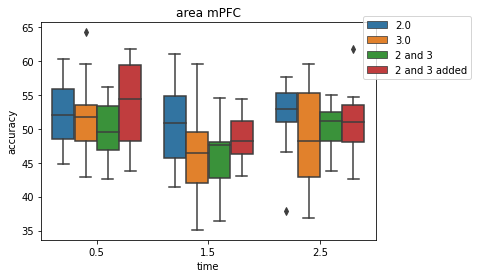

In [22]:
sns.boxplot(x="time", y="accuracy", hue="stimulus", data=tot_results_mPFC) #we plot the results for mPFC areas
plt.title('area mPFC')
plt.legend(loc=1,bbox_to_anchor=(1.05, 0.8, 0.25, 0.25))

In [23]:
#Brain region tjM1
acc_mod_tjM1=np.zeros((3,10))#it will contain all the accuracies when we consider stimulus 2 and 3 together with the added feature across different pre-stimulus time intervals
acc2_tjM1=np.zeros((3,10)) #it will contain all the accuracies when we consider stimulus 2 for different pre- stimulus time intervals
acc3_tjM1=np.zeros((3,10)) #it will contain all the accuracies when we consider stimulus 3 for different pre- stimulus time intervals
acc_tjM1=np.zeros((3,10)) #it will contain all the accuracies when we consider stimulus 2 for different pre- stimulus time intervals
for t in range(len(times)):
  acc_mod_tjM1[t,:], acc2_tjM1[t,:], acc3_tjM1[t,:], acc_tjM1[t,:]=copy_complete_model(data_path,times[t] , clf_tjM1, 'tjM1')

**********************************
time  0.5
dimesione dataset used for added feature (490,)
accuracy with added feature
The cross validated score is: 0.4551 the crossvalidation standard deviation is  0.0619
dimesion dataset used (226,)  accuracy stimulus 2
The cross validated score is: 0.47 the crossvalidation standard deviation is  0.1051
accuracy stimulus 3
dimesion dataset used (264,)  accuracy stimulus 3
The cross validated score is: 0.516 the crossvalidation standard deviation is  0.1057
dimension dataset used (582,) accuracy without added feature
The cross validated score is: 0.5122 the crossvalidation standard deviation is  0.0341
**********************************
time  1.5
dimesione dataset used for added feature (490,)
accuracy with added feature
The cross validated score is: 0.4673 the crossvalidation standard deviation is  0.0858
dimesion dataset used (226,)  accuracy stimulus 2
The cross validated score is: 0.4338 the crossvalidation standard deviation is  0.062
accuracy 

In [24]:
tot_results_tjM1=pd.DataFrame(columns=['time', 'stimulus', 'accuracy']) #as before we transform all the result in a Pandas Dataframe, this Dataframe in particular contains all the results for tjM1 brain area 
#for different prestimulus time intervals and stimulus characteristcs
for acc in acc2_tjM1[0,:]:
  results_time0 = results_time0.append({'area' : areas[2], 'stimulus' :2, 'accuracy' : acc}, ignore_index=True)
  tot_results_tjM1=tot_results_tjM1.append({'time':0.5, 'stimulus':2, 'accuracy':acc}, ignore_index=True)
for acc in acc3_tjM1[0,:]:
  results_time0=results_time0.append({'area':areas[2], 'stimulus':3, 'accuracy':acc}, ignore_index=True)
  tot_results_tjM1=tot_results_tjM1.append({'time':0.5, 'stimulus':3, 'accuracy':acc}, ignore_index=True)
for acc in acc2_tjM1[1,:]:
  results_time1 = results_time1.append({'area' : areas[2], 'stimulus' :2, 'accuracy' : acc}, ignore_index=True)
  tot_results_tjM1=tot_results_tjM1.append({'time':1.5, 'stimulus':2, 'accuracy':acc}, ignore_index=True)
for acc in acc3_tjM1[1,:]:
  results_time1=results_time1.append({'area':areas[2], 'stimulus':3, 'accuracy':acc}, ignore_index=True)
  tot_results_tjM1=tot_results_tjM1.append({'time':1.5, 'stimulus':3, 'accuracy':acc}, ignore_index=True)
for acc in acc2_tjM1[2,:]:
  results_time2 = results_time2.append({'area' : areas[2], 'stimulus' :2, 'accuracy' : acc}, ignore_index=True)
  tot_results_tjM1=tot_results_tjM1.append({'time':2.5, 'stimulus':2, 'accuracy':acc}, ignore_index=True)
for acc in acc3_tjM1[2,:]:
  results_time2=results_time2.append({'area':areas[2], 'stimulus':3, 'accuracy':acc}, ignore_index=True)
  tot_results_tjM1=tot_results_tjM1.append({'time':2.5, 'stimulus':3, 'accuracy':acc}, ignore_index=True)
for acc in acc_tjM1[0,:]:
  tot_results_tjM1=tot_results_tjM1.append({'time':0.5, 'stimulus':'2 and 3', 'accuracy':acc}, ignore_index=True)
for acc in acc_mPFC[1,:]:
  tot_results_tjM1=tot_results_tjM1.append({'time':1.5, 'stimulus':'2 and 3', 'accuracy':acc}, ignore_index=True)
for acc in acc_tjM1[2,:]:
  tot_results_tjM1=tot_results_tjM1.append({'time':2.5, 'stimulus':'2 and 3', 'accuracy':acc}, ignore_index=True)
for acc in acc_mod_tjM1[0,:]:
  tot_results_tjM1=tot_results_tjM1.append({'time':0.5, 'stimulus':'2 and 3 added', 'accuracy':acc}, ignore_index=True)
for acc in acc_mod_tjM1[1,:]:
  tot_results_tjM1=tot_results_tjM1.append({'time':1.5, 'stimulus':'2 and 3 added', 'accuracy':acc}, ignore_index=True)
for acc in acc_mod_tjM1[2,:]:
  tot_results_tjM1=tot_results_tjM1.append({'time':2.5, 'stimulus':'2 and 3 added', 'accuracy':acc}, ignore_index=True)




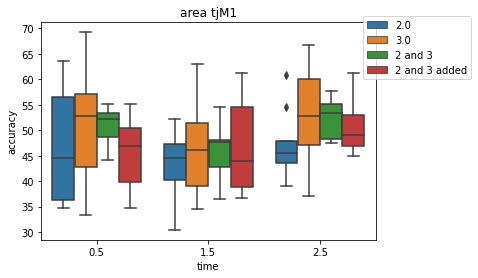

In [25]:
sns.boxplot(x="time", y="accuracy", hue="stimulus", data=tot_results_tjM1) #we plot the results for tjM1
plt.title('area tjM1')
plt.legend(loc=1,bbox_to_anchor=(1.05, 0.8, 0.25, 0.25))

Text(0.5, 1.0, 'time 0.5 s')

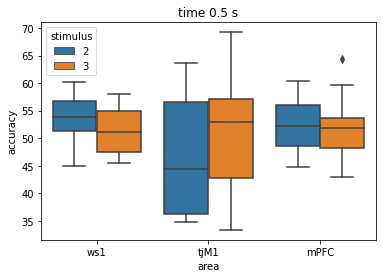

In [ ]:
sns.boxplot(x="area", y="accuracy", hue="stimulus", data=results_time0) #we plot the results across the different areas for time interval 0.5 and stimulus amplitude 2 and 3
plt.title('time 0.5 s')

Text(0.5, 1.0, 'time 1.5 s')

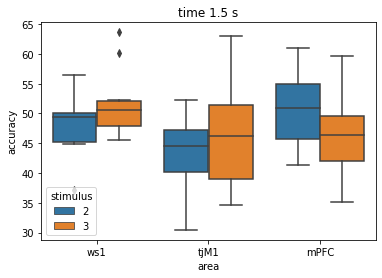

In [ ]:
sns.boxplot(x="area", y="accuracy", hue="stimulus", data=results_time1) #we plot the results across the different areas for time interval 1.5 and stimulus amplitude 2 and 3
plt.title('time 1.5 s')

Text(0.5, 1.0, 'time 2.5 s')

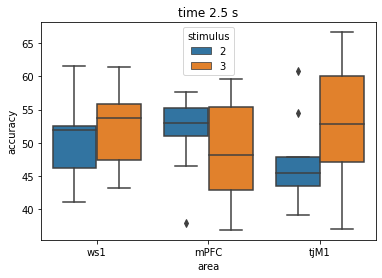

In [26]:
sns.boxplot(x="area", y="accuracy", hue="stimulus", data=results_time2) #we plot the results across the different areas for time interval 2.5 and stimulus amplitude 2 and 3
plt.title('time 2.5 s')

# Graphs using error bar on prediction on different stimulus amplitude and pre stimulus time interval for each area 

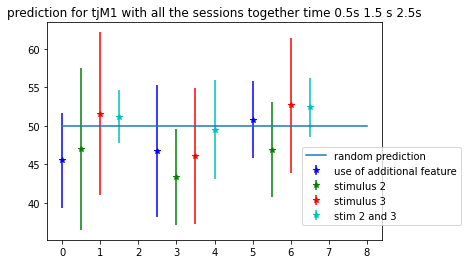

In [31]:
x=np.array([0, 2.5, 5]) #this graphs shows the same thing as the one above but with a different format usign error bars, in this case for area tjM1
x1=np.array([0.5, 3, 5.5])
x2=np.array([1, 3.5, 6])
x3=np.array([1.5, 4, 6.5])

X0=np.linspace(0,8,100)
y0=50*np.ones(100)

plt.errorbar(x, np.mean(acc_mod_tjM1,1), np.std(acc_mod_tjM1,1), fmt='*', color = 'b', label='use of additional feature') #blue
plt.errorbar(x1, np.mean(acc2_tjM1,1), np.std(acc2_tjM1,1), fmt='*', color= 'g', label='stimulus 2') #orange
plt.errorbar(x2, np.mean(acc3_tjM1,1), np.std(acc3_tjM1,1), fmt='*',color='r', label='stimulus 3') #green
plt.errorbar(x3, np.mean(acc_tjM1,1), np.std(acc_tjM1,1), fmt='*',color='c', label='stim 2 and 3') #red
plt.plot(X0,y0, label='random prediction')
plt.legend()
plt.title('prediction for tjM1 with all the sessions together time 0.5s 1.5 s 2.5s')
plt.legend(loc=1,bbox_to_anchor=(1, 0.2, 0.25, 0.25))

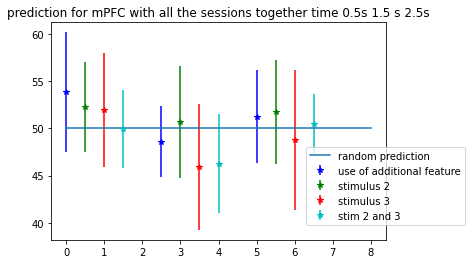

In [32]:
x=np.array([0, 2.5, 5]) #graph for area mPFC
x1=np.array([0.5, 3, 5.5])
x2=np.array([1, 3.5, 6])
x3=np.array([1.5, 4, 6.5])

X0=np.linspace(0,8,100)
y0=50*np.ones(100)

plt.errorbar(x, np.mean(acc_mod_mPFC,1), np.std(acc_mod_mPFC,1), fmt='*', color = 'b', label='use of additional feature') #blue
plt.errorbar(x1, np.mean(acc2_mPFC,1), np.std(acc2_mPFC,1), fmt='*', color= 'g', label='stimulus 2') #orange
plt.errorbar(x2, np.mean(acc3_mPFC,1), np.std(acc3_mPFC,1), fmt='*',color='r', label='stimulus 3') #green
plt.errorbar(x3, np.mean(acc_mPFC,1), np.std(acc_mPFC,1), fmt='*',color='c', label='stim 2 and 3') #red
plt.plot(X0,y0, label='random prediction')
plt.legend()
plt.title('prediction for mPFC with all the sessions together time 0.5s 1.5 s 2.5s')
plt.legend(loc=1,bbox_to_anchor=(1, 0.2, 0.25, 0.25))

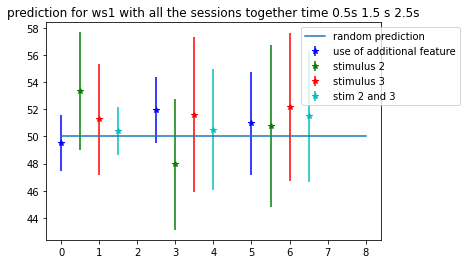

In [33]:
x=np.array([0, 2.5, 5]) #graph for area ws1
x1=np.array([0.5, 3, 5.5])
x2=np.array([1, 3.5, 6])
x3=np.array([1.5, 4, 6.5])

X0=np.linspace(0,8,100)
y0=50*np.ones(100)

plt.errorbar(x, np.mean(acc_mod_ws1,1), np.std(acc_mod_ws1,1), fmt='*', color = 'b', label='use of additional feature') #blue
plt.errorbar(x1, np.mean(acc2_ws1,1), np.std(acc2_ws1,1), fmt='*', color= 'g', label='stimulus 2') #orange
plt.errorbar(x2, np.mean(acc3_ws1,1), np.std(acc3_ws1,1), fmt='*',color='r', label='stimulus 3') #green
plt.errorbar(x3, np.mean(acc_ws1,1), np.std(acc_ws1,1), fmt='*',color='c', label='stim 2 and 3') #red
plt.plot(X0,y0, label='random prediction')
plt.legend()
plt.title('prediction for ws1 with all the sessions together time 0.5s 1.5 s 2.5s')
plt.legend(loc=1,bbox_to_anchor=(1, 0.75, 0.25, 0.25))

# error bars describing time dependency graph per time

Text(0.5, 1.0, 'time 0.5 stimulus 2 and 3')

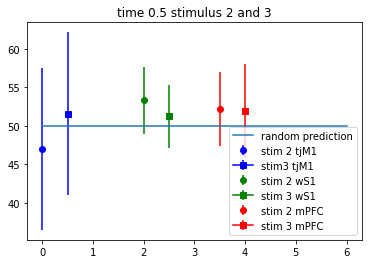

In [35]:
x=0
x1=0.5
x2=1
x3=2
x4=2.5
x5=3.5
x6=4
x7=4
x8=5
x9=5.5
x10=6
x11=6.5
X0=np.linspace(0,6,100)
y0=50*np.ones(100)


plt.errorbar(x, np.mean(acc2_tjM1[0,:]), np.std(acc2_tjM1[0,:]), fmt='o', color= 'b', label='stim 2 tjM1') #orange
plt.errorbar(x1, np.mean(acc3_tjM1[0,:]), np.std(acc3_tjM1[0,:]), marker='s',color='b', label='stim3 tjM1') #green
plt.plot(X0,y0, label='random prediction')
plt.errorbar(x3,np.mean(acc2_ws1[0,:]), np.std(acc2_ws1[0,:]), fmt='o', color= 'g', label='stim 2 wS1')
plt.errorbar(x4,np.mean(acc3_ws1[0,:]), np.std(acc3_ws1[0,:]), marker ='s', color= 'g', label='stim 3 wS1')
plt.errorbar(x5, np.mean(acc2_mPFC[0,:]), np.std(acc2_mPFC[0,:]), fmt='o', color='r', label='stim 2 mPFC')
plt.errorbar(x6, np.mean(acc3_mPFC[0,:]), np.std(acc3_mPFC[0,:]), marker = 's', color='r', label='stim 3 mPFC')
plt.legend()
plt.title('time 0.5 stimulus 2 and 3')

Text(0.5, 1.0, 'time 1.5 stimulus 2 and 3')

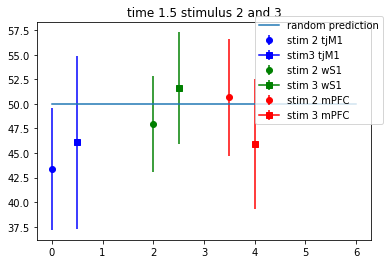

In [37]:
x=0
x1=0.5
x2=1
x3=2
x4=2.5
x5=3.5
x6=4
x7=4
x8=5
x9=5.5
x10=6
x11=6.5
X0=np.linspace(0,6,100)
y0=50*np.ones(100)


plt.errorbar(x, np.mean(acc2_tjM1[1,:]), np.std(acc2_tjM1[1,:]), fmt='o', color= 'b', label='stim 2 tjM1') #orange
plt.errorbar(x1, np.mean(acc3_tjM1[1,:]), np.std(acc3_tjM1[1,:]), marker='s',color='b', label='stim3 tjM1') #green
plt.plot(X0,y0, label='random prediction')
plt.errorbar(x3,np.mean(acc2_ws1[1,:]), np.std(acc2_ws1[1,:]), fmt='o', color= 'g', label='stim 2 wS1')
plt.errorbar(x4,np.mean(acc3_ws1[1,:]), np.std(acc3_ws1[1,:]), marker ='s', color= 'g', label='stim 3 wS1')
plt.errorbar(x5, np.mean(acc2_mPFC[1,:]), np.std(acc2_mPFC[1,:]), fmt='o', color='r', label='stim 2 mPFC')
plt.errorbar(x6, np.mean(acc3_mPFC[1,:]), np.std(acc3_mPFC[1,:]), marker = 's', color='r', label='stim 3 mPFC')
plt.legend()
plt.legend(loc=1,bbox_to_anchor=(0.8, 0.8, 0.25, 0.25))
plt.title('time 1.5 stimulus 2 and 3')

Text(0.5, 1.0, 'time 1.5 stimulus 2 and 3')

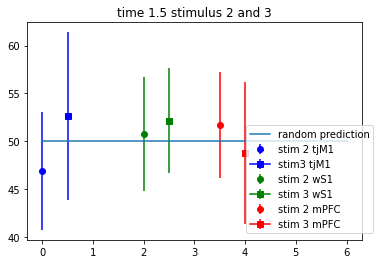

In [38]:
x=0
x1=0.5
x2=1
x3=2
x4=2.5
x5=3.5
x6=4
x7=4
x8=5
x9=5.5
x10=6
x11=6.5
X0=np.linspace(0,6,100)
y0=50*np.ones(100)


plt.errorbar(x, np.mean(acc2_tjM1[2,:]), np.std(acc2_tjM1[2,:]), fmt='o', color= 'b', label='stim 2 tjM1') #orange
plt.errorbar(x1, np.mean(acc3_tjM1[2,:]), np.std(acc3_tjM1[2,:]), marker='s',color='b', label='stim3 tjM1') #green
plt.plot(X0,y0, label='random prediction')
plt.errorbar(x3,np.mean(acc2_ws1[2,:]), np.std(acc2_ws1[2,:]), fmt='o', color= 'g', label='stim 2 wS1')
plt.errorbar(x4,np.mean(acc3_ws1[2,:]), np.std(acc3_ws1[2,:]), marker ='s', color= 'g', label='stim 3 wS1')
plt.errorbar(x5, np.mean(acc2_mPFC[2,:]), np.std(acc2_mPFC[2,:]), fmt='o', color='r', label='stim 2 mPFC')
plt.errorbar(x6, np.mean(acc3_mPFC[2,:]), np.std(acc3_mPFC[2,:]), marker = 's', color='r', label='stim 3 mPFC')
plt.legend()
plt.legend(loc=1,bbox_to_anchor=(0.8, 0.3, 0.25, 0.25))
plt.title('time 1.5 stimulus 2 and 3')

We look at whether tuning the hyperparameters differently for stimulus 2 and 3 could make a difference

# stimulus 2 seach of hyperparameters

In [ ]:
clf0=TimeSeriesForest(random_state=43) #search of hyperparameter for signals produced with stimulus 2 for the area mPFC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
windows=np.array([1,3,5,7,9])
estim=np.array([100,200,300,400,600, 700,900])
depth=np.array([2,4,6,10,15])
X_mPFC2,y_mPFC2=preprocess_dataset(data_path, 'mPFC', start=2.5, select_amplitude=[2])
X_train, X_test, y_train, y_test = train_test_split(X_mPFC2, y_mPFC2, test_size=0.2, random_state=0)
tuned_parameters = {"n_estimators": [100,200,300,400,600, 700,900], "n_windows":[1,3,5,7,9] , "max_depth": [2,4,6,10,15]}

clf = GridSearchCV(clf0, tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
print("best score: ", clf.best_score_ )

Best parameters set found on development set:

{'max_depth': 2, 'n_estimators': 200, 'n_windows': 5}

Grid scores on development set:

0.535 (+/-0.059) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 1}
0.499 (+/-0.044) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 3}
0.522 (+/-0.081) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 5}
0.445 (+/-0.052) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 7}
0.486 (+/-0.045) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 9}
0.531 (+/-0.054) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 1}
0.488 (+/-0.054) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 3}
0.557 (+/-0.065) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 5}
0.458 (+/-0.031) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 7}
0.495 (+/-0.050) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 9}
0.544 (+/-0.057) for {'max_depth': 2, 'n_estimators': 300, 'n_windows': 1}
0.482 (+/-0.080) for {'max_depth': 2, 'n

In [ ]:
clf0=TimeSeriesForest(random_state=43) #search of best hyperparameters for stimulus amplitude 2 and area tjM1 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
windows=np.array([1,3,5,7,9])
estim=np.array([100,200,300,400,600, 700,900])
depth=np.array([2,4,6,10,15])
X2_tjM1,y2_tjM1=preprocess_dataset(data_path, 'tjM1', start=2.5, select_amplitude=[2])
X_train, X_test, y_train, y_test = train_test_split(X2_tjM1, y2_tjM1, test_size=0.2, random_state=0)
tuned_parameters = {"n_estimators": [100,200,300,400,600, 700,900], "n_windows":[1,3,5,7,9] , "max_depth": [2,4,6,10,15]}

clf = GridSearchCV(clf0, tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
print("best score: ", clf.best_score_ )

Best parameters set found on development set:

{'max_depth': 4, 'n_estimators': 400, 'n_windows': 1}

Grid scores on development set:

0.561 (+/-0.089) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 1}
0.456 (+/-0.075) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 3}
0.433 (+/-0.163) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 5}
0.478 (+/-0.133) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 7}
0.500 (+/-0.093) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 9}
0.567 (+/-0.147) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 1}
0.444 (+/-0.061) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 3}
0.433 (+/-0.143) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 5}
0.506 (+/-0.147) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 7}
0.500 (+/-0.086) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 9}
0.556 (+/-0.136) for {'max_depth': 2, 'n_estimators': 300, 'n_windows': 1}
0.461 (+/-0.057) for {'max_depth': 2, 'n

In [ ]:
clf0=TimeSeriesForest(random_state=43) #search of the best hyperparametr for amplitude stimulus 2 with brain area ws1
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
windows=np.array([1,3,5,7,9])
estim=np.array([100,200,300,400,600, 700,900])
depth=np.array([2,4,6,10,15])
X2_ws1,y2_ws1=preprocess_dataset(data_path, 'wS1', start=2.5, select_amplitude=[2])
X_train, X_test, y_train, y_test = train_test_split(X2_ws1, y2_ws1, test_size=0.2, random_state=0)
tuned_parameters = {"n_estimators": [100,200,300,400,600, 700,900], "n_windows":[1,3,5,7,9] , "max_depth": [2,4,6,10,15]}

clf = GridSearchCV(clf0, tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
print("best score: ", clf.best_score_ )

Best parameters set found on development set:

{'max_depth': 6, 'n_estimators': 200, 'n_windows': 7}

Grid scores on development set:

0.526 (+/-0.030) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 1}
0.503 (+/-0.077) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 3}
0.521 (+/-0.081) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 5}
0.513 (+/-0.074) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 7}
0.510 (+/-0.062) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 9}
0.518 (+/-0.017) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 1}
0.524 (+/-0.054) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 3}
0.524 (+/-0.072) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 5}
0.521 (+/-0.106) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 7}
0.511 (+/-0.069) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 9}
0.529 (+/-0.028) for {'max_depth': 2, 'n_estimators': 300, 'n_windows': 1}
0.519 (+/-0.054) for {'max_depth': 2, 'n

In [39]:
clf_stim2_ws1=TimeSeriesForest(n_estimators=200, n_windows=7, random_state=43, max_depth=6) #selection of the classifier based on the search of the best hyperparameters
clf_stim2_tjM1=TimeSeriesForest(n_estimators=400, n_windows=1, random_state=43, max_depth=4)
clf_stim2_mPFC=TimeSeriesForest(n_estimators=200, n_windows=5, random_state=43, max_depth=2)


# stimilus 3 search of hyperparameters

In [ ]:
clf0=TimeSeriesForest(random_state=43) #search of hyperparameters for amplitude stimulus 3, brain area ws1
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
windows=np.array([1,3,5,7,9])
estim=np.array([100,200,300,400,600, 700,900])
depth=np.array([2,4,6,10,15])
X3_ws1,y3_ws1=preprocess_dataset(data_path, 'wS1', start=2.5, select_amplitude=[3])
X_train, X_test, y_train, y_test = train_test_split(X3_ws1, y3_ws1, test_size=0.2, random_state=0)
tuned_parameters = {"n_estimators": [100,200,300,400,600, 700,900], "n_windows":[1,3,5,7,9] , "max_depth": [2,4,6,10,15]}

clf = GridSearchCV(clf0, tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
print("best score: ", clf.best_score_ )

Best parameters set found on development set:

{'max_depth': 10, 'n_estimators': 400, 'n_windows': 9}

Grid scores on development set:

0.473 (+/-0.099) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 1}
0.489 (+/-0.045) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 3}
0.520 (+/-0.064) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 5}
0.521 (+/-0.069) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 7}
0.551 (+/-0.061) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 9}
0.471 (+/-0.098) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 1}
0.499 (+/-0.046) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 3}
0.516 (+/-0.071) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 5}
0.536 (+/-0.069) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 7}
0.543 (+/-0.058) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 9}
0.471 (+/-0.074) for {'max_depth': 2, 'n_estimators': 300, 'n_windows': 1}
0.494 (+/-0.056) for {'max_depth': 2, '

In [ ]:
clf0=TimeSeriesForest(random_state=43) #search of the best hyperparameters for brain area tjM1 and stimulus amplitude 3
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
windows=np.array([1,3,5,7,9])
estim=np.array([100,200,300,400,600, 700,900])
depth=np.array([2,4,6,10,15])
X3_tjM1,y3_tjM1=preprocess_dataset(data_path, 'tjM1', start=2.5, select_amplitude=[3])
X_train, X_test, y_train, y_test = train_test_split(X3_tjM1, y3_tjM1, test_size=0.2, random_state=0)
tuned_parameters = {"n_estimators": [100,200,300,400,600, 700,900], "n_windows":[1,3,5,7,9] , "max_depth": [2,4,6,10,15]}

clf = GridSearchCV(clf0, tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
print("best score: ", clf.best_score_ )

Best parameters set found on development set:

{'max_depth': 2, 'n_estimators': 300, 'n_windows': 7}

Grid scores on development set:

0.507 (+/-0.098) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 1}
0.545 (+/-0.146) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 3}
0.516 (+/-0.129) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 5}
0.512 (+/-0.189) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 7}
0.536 (+/-0.064) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 9}
0.526 (+/-0.110) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 1}
0.540 (+/-0.133) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 3}
0.535 (+/-0.139) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 5}
0.554 (+/-0.186) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 7}
0.526 (+/-0.105) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 9}
0.526 (+/-0.110) for {'max_depth': 2, 'n_estimators': 300, 'n_windows': 1}
0.535 (+/-0.138) for {'max_depth': 2, 'n

In [ ]:
clf0=TimeSeriesForest(random_state=43) #search of the best hyperparameter for stimulus amplitude 3 and brain area mPFC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
windows=np.array([1,3,5,7,9])
estim=np.array([100,200,300,400,600, 700,900])
depth=np.array([2,4,6,10,15])
X_mPFC3,y_mPFC3=preprocess_dataset(data_path, 'mPFC', start=2.5, select_amplitude=[3])
X_train, X_test, y_train, y_test = train_test_split(X_mPFC3, y_mPFC3, test_size=0.2, random_state=0)
tuned_parameters = {"n_estimators": [100,200,300,400,600, 700,900], "n_windows":[1,3,5,7,9] , "max_depth": [2,4,6,10,15]}

clf = GridSearchCV(clf0, tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()
print("best score: ", clf.best_score_ )

Best parameters set found on development set:

{'max_depth': 10, 'n_estimators': 900, 'n_windows': 9}

Grid scores on development set:

0.523 (+/-0.061) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 1}
0.519 (+/-0.042) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 3}
0.523 (+/-0.109) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 5}
0.501 (+/-0.050) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 7}
0.506 (+/-0.043) for {'max_depth': 2, 'n_estimators': 100, 'n_windows': 9}
0.526 (+/-0.049) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 1}
0.497 (+/-0.072) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 3}
0.535 (+/-0.054) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 5}
0.481 (+/-0.041) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 7}
0.508 (+/-0.050) for {'max_depth': 2, 'n_estimators': 200, 'n_windows': 9}
0.526 (+/-0.049) for {'max_depth': 2, 'n_estimators': 300, 'n_windows': 1}
0.490 (+/-0.062) for {'max_depth': 2, '

In [40]:
clf_stim3_ws1=TimeSeriesForest(n_estimators=400, n_windows=9, random_state=43, max_depth=10)
clf_stim3_tjM1 =TimeSeriesForest(n_estimators=300, n_windows=7, random_state=43, max_depth=2)
clf_stim3_mPFC=TimeSeriesForest(n_estimators=900, n_windows=9, random_state=43, max_depth=10)

# Prediction using the hyperparameter tuned separately on stimulus 2 and 3 to seei 

In [49]:
#brain area ws1
#we calculate the mean accuracy of the predictions and their standard deviation usign 10 - fold cross validation for different pre-stimulus time intervals (0.5 s, 1.5 s, 2.5s)
deep_acc_mod_ws1=np.zeros((3,2)) #contain the mean accuracy and standard deviationfor stimlus 2 and 3 with the added feature across different pre-stimulus time interval
deep_acc_stim2_ws1=np.zeros((3,2)) ##contain the mean accuracy and standard deviationfor stimlus 2 and 3 with the added feature across different pre-stimulus time interval
deep_acc_stim3_ws1=np.zeros((3,2)) #contain the mean accuracy and standard deviationfor stimlus 3 across different pre-stimulus time interval
deep_acc_ws1=np.zeros((3,2)) #contain the mean accuracy and standard deviationfor stimlus 2 and 3  across different pre-stimulus time interval
for t in range(len(times)):
  deep_acc_mod_ws1[t,:], deep_acc_stim2_ws1[t,:], deep_acc_stim3_ws1[t,:], deep_acc_ws1[t,:]=complete_model(data_path, times[t], clf_ws1, clf_stim2_ws1, clf_stim3_ws1, clf_ws1, 'wS1')

**********************************
time  0.5
dimesione dataset used for added feature (1658,)
accuracy with added feature
The cross validated score is: 0.4952 the crossvalidation standard deviation is  0.0207
dimesion dataset used (780,)  accuracy stimulus 2
The cross validated score is: 0.5103 the crossvalidation standard deviation is  0.0482
accuracy stimulus 3
dimesion dataset used (878,)  accuracy stimulus 3
The cross validated score is: 0.5046 the crossvalidation standard deviation is  0.0527
dimension dataset used (1808,) accuracy without added feature
The cross validated score is: 0.5039 the crossvalidation standard deviation is  0.0177
**********************************
time  1.5
dimesione dataset used for added feature (1658,)
accuracy with added feature
The cross validated score is: 0.5193 the crossvalidation standard deviation is  0.0243
dimesion dataset used (780,)  accuracy stimulus 2
The cross validated score is: 0.4885 the crossvalidation standard deviation is  0.0569
ac

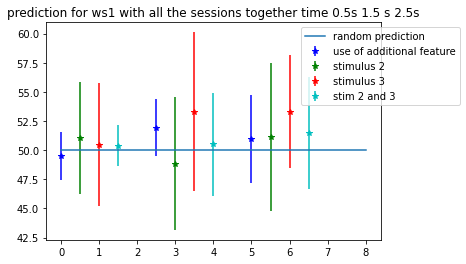

In [51]:
x=np.array([0, 2.5, 5]) #graphs of the result obtained for ws1 
x1=np.array([0.5, 3, 5.5])
x2=np.array([1, 3.5, 6])
x3=np.array([1.5, 4, 6.5])

X0=np.linspace(0,8,100)
y0=50*np.ones(100)

plt.errorbar(x, deep_acc_mod_ws1[:,0], deep_acc_mod_ws1[:,1], fmt='*', color = 'b', label='use of additional feature') #blue
plt.errorbar(x1, deep_acc_stim2_ws1[:,0], deep_acc_stim2_ws1[:,1], fmt='*', color= 'g', label='stimulus 2') #orange
plt.errorbar(x2, deep_acc_stim3_ws1[:,0], deep_acc_stim3_ws1[:,1], fmt='*',color='r', label='stimulus 3') #green
plt.errorbar(x3, deep_acc_ws1[:,0], deep_acc_ws1[:,1], fmt='*',color='c', label='stim 2 and 3') #red
plt.plot(X0,y0, label='random prediction')
plt.legend()
plt.title('prediction for ws1 with all the sessions together time 0.5s 1.5 s 2.5s')
plt.legend(loc=1,bbox_to_anchor=(1, 0.75, 0.25, 0.25))

In [52]:
#same thing as before but this is the brain area mPFC
deep_acc_mod_mPFC=np.zeros((3,2))
deep_acc_stim2_mPFC=np.zeros((3,2))
deep_acc_stim3_mPFC=np.zeros((3,2))
deep_acc_mPFC=np.zeros((3,2))
for t in range(len(times)):
  deep_acc_mod_mPFC[t,:], deep_acc_stim2_mPFC[t,:], deep_acc_stim3_mPFC[t,:], deep_acc_mPFC[t,:]=complete_model(data_path, times[t], clf_mPFC, clf_stim2_mPFC, clf_stim3_mPFC, clf_mPFC, 'mPFC')

**********************************
time  0.5
dimesione dataset used for added feature (1146,)
accuracy with added feature
The cross validated score is: 0.5384 the crossvalidation standard deviation is  0.0632
dimesion dataset used (584,)  accuracy stimulus 2
The cross validated score is: 0.5273 the crossvalidation standard deviation is  0.0471
accuracy stimulus 3
dimesion dataset used (562,)  accuracy stimulus 3
The cross validated score is: 0.5195 the crossvalidation standard deviation is  0.0559
dimension dataset used (1292,) accuracy without added feature
The cross validated score is: 0.4992 the crossvalidation standard deviation is  0.0409
**********************************
time  1.5
dimesione dataset used for added feature (1146,)
accuracy with added feature
The cross validated score is: 0.486 the crossvalidation standard deviation is  0.0373
dimesion dataset used (584,)  accuracy stimulus 2
The cross validated score is: 0.5119 the crossvalidation standard deviation is  0.0315
acc

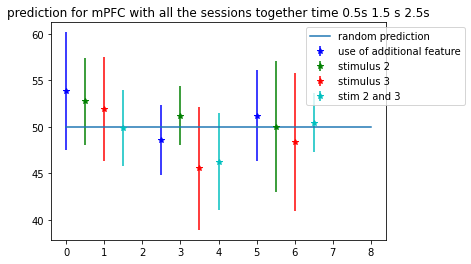

In [53]:
x=np.array([0, 2.5, 5]) #graph for mPFC brain area
x1=np.array([0.5, 3, 5.5])
x2=np.array([1, 3.5, 6])
x3=np.array([1.5, 4, 6.5])

X0=np.linspace(0,8,100)
y0=50*np.ones(100)

plt.errorbar(x, deep_acc_mod_mPFC[:,0], deep_acc_mod_mPFC[:,1], fmt='*', color = 'b', label='use of additional feature') #blue
plt.errorbar(x1, deep_acc_stim2_mPFC[:,0], deep_acc_stim2_mPFC[:,1], fmt='*', color= 'g', label='stimulus 2') #orange
plt.errorbar(x2, deep_acc_stim3_mPFC[:,0], deep_acc_stim3_mPFC[:,1], fmt='*',color='r', label='stimulus 3') #green
plt.errorbar(x3, deep_acc_mPFC[:,0], deep_acc_mPFC[:,1], fmt='*',color='c', label='stim 2 and 3') #red
plt.plot(X0,y0, label='random prediction')
plt.legend()
plt.title('prediction for mPFC with all the sessions together time 0.5s 1.5 s 2.5s')
plt.legend(loc=1,bbox_to_anchor=(1, 0.75, 0.25, 0.25))

In [54]:
deep_acc_mod_tjM1=np.zeros((3,2)) #same thing as before but for brain area tjM1
deep_acc_stim2_tjM1=np.zeros((3,2))
deep_acc_stim3_tjM1=np.zeros((3,2))
deep_acc_tjM1=np.zeros((3,2))
for t in range(len(times)):
  deep_acc_mod_tjM1[t,:], deep_acc_stim2_tjM1[t,:], deep_acc_stim3_tjM1[t,:], deep_acc_tjM1[t,:]=complete_model(data_path, times[t], clf_tjM1, clf_stim2_tjM1, clf_stim3_tjM1, clf_tjM1, 'mPFC')

**********************************
time  0.5
dimesione dataset used for added feature (1146,)
accuracy with added feature
The cross validated score is: 0.5323 the crossvalidation standard deviation is  0.0249
dimesion dataset used (584,)  accuracy stimulus 2
The cross validated score is: 0.4608 the crossvalidation standard deviation is  0.0597
accuracy stimulus 3
dimesion dataset used (562,)  accuracy stimulus 3
The cross validated score is: 0.4678 the crossvalidation standard deviation is  0.0425
dimension dataset used (1292,) accuracy without added feature
The cross validated score is: 0.4774 the crossvalidation standard deviation is  0.061
**********************************
time  1.5
dimesione dataset used for added feature (1146,)
accuracy with added feature
The cross validated score is: 0.4843 the crossvalidation standard deviation is  0.0328
dimesion dataset used (584,)  accuracy stimulus 2
The cross validated score is: 0.5101 the crossvalidation standard deviation is  0.052
accu

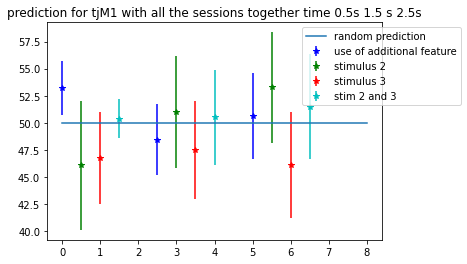

In [55]:
x=np.array([0, 2.5, 5]) #graph for brain area tjM1
x1=np.array([0.5, 3, 5.5])
x2=np.array([1, 3.5, 6])
x3=np.array([1.5, 4, 6.5])

X0=np.linspace(0,8,100)
y0=50*np.ones(100)

plt.errorbar(x, deep_acc_mod_tjM1[:,0], deep_acc_mod_tjM1[:,1], fmt='*', color = 'b', label='use of additional feature') #blue
plt.errorbar(x1, deep_acc_stim2_tjM1[:,0], deep_acc_stim2_tjM1[:,1], fmt='*', color= 'g', label='stimulus 2') #orange
plt.errorbar(x2, deep_acc_stim3_tjM1[:,0], deep_acc_stim3_tjM1[:,1], fmt='*',color='r', label='stimulus 3') #green
plt.errorbar(x3, deep_acc_ws1[:,0], deep_acc_ws1[:,1], fmt='*',color='c', label='stim 2 and 3') #red
plt.plot(X0,y0, label='random prediction')
plt.legend()
plt.title('prediction for tjM1 with all the sessions together time 0.5s 1.5 s 2.5s')
plt.legend(loc=1,bbox_to_anchor=(1, 0.75, 0.25, 0.25))

# graph per time

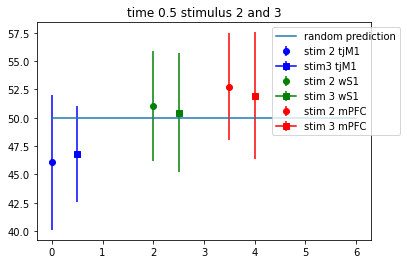

In [56]:
x=0 #graph for time interval 0.5 for stimulus 2 and 3 across different brain areas
x1=0.5
x2=1
x3=2
x4=2.5
x5=3.5
x6=4
x7=4
x8=5
x9=5.5
x10=6
x11=6.5
X0=np.linspace(0,6,100)
y0=50*np.ones(100)


plt.errorbar(x, deep_acc_stim2_tjM1[0,0], deep_acc_stim2_tjM1[0,1], fmt='o', color= 'b', label='stim 2 tjM1') #orange
plt.errorbar(x1, deep_acc_stim3_tjM1[0,0], deep_acc_stim3_tjM1[0,1], marker='s',color='b', label='stim3 tjM1') #green
plt.plot(X0,y0, label='random prediction')
plt.errorbar(x3,deep_acc_stim2_ws1[0,0], deep_acc_stim2_ws1[0,1], fmt='o', color= 'g', label='stim 2 wS1')
plt.errorbar(x4,deep_acc_stim3_ws1[0,0], deep_acc_stim3_ws1[0,1], marker ='s', color= 'g', label='stim 3 wS1')
plt.errorbar(x5, deep_acc_stim2_mPFC[0,0], deep_acc_stim2_mPFC[0,1], fmt='o', color='r', label='stim 2 mPFC')
plt.errorbar(x6, deep_acc_stim3_mPFC[0,0], deep_acc_stim3_mPFC[0,1], marker = 's', color='r', label='stim 3 mPFC')
plt.legend()
plt.title('time 0.5 stimulus 2 and 3')
plt.legend(loc=1,bbox_to_anchor=(0.85, 0.75, 0.25, 0.25))

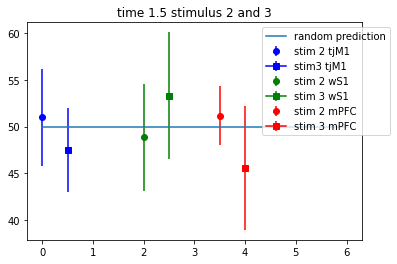

In [58]:
x=0 #graph time interval 1.5 across different brain areas for stimulus 2 and 3 with the hyperparameters tuned differently for stimulus 2 and 3
x1=0.5
x2=1
x3=2
x4=2.5
x5=3.5
x6=4
x7=4
x8=5
x9=5.5
x10=6
x11=6.5
X0=np.linspace(0,6,100)
y0=50*np.ones(100)


plt.errorbar(x, deep_acc_stim2_tjM1[1,0], deep_acc_stim2_tjM1[1,1], fmt='o', color= 'b', label='stim 2 tjM1') #orange
plt.errorbar(x1, deep_acc_stim3_tjM1[1,0], deep_acc_stim3_tjM1[1,1], marker='s',color='b', label='stim3 tjM1') #green
plt.plot(X0,y0, label='random prediction')
plt.errorbar(x3,deep_acc_stim2_ws1[1,0], deep_acc_stim2_ws1[1,1], fmt='o', color= 'g', label='stim 2 wS1')
plt.errorbar(x4,deep_acc_stim3_ws1[1,0], deep_acc_stim3_ws1[1,1], marker ='s', color= 'g', label='stim 3 wS1')
plt.errorbar(x5, deep_acc_stim2_mPFC[1,0], deep_acc_stim2_mPFC[1,1], fmt='o', color='r', label='stim 2 mPFC')
plt.errorbar(x6, deep_acc_stim3_mPFC[1,0], deep_acc_stim3_mPFC[1,1], marker = 's', color='r', label='stim 3 mPFC')
plt.legend()
plt.title('time 1.5 stimulus 2 and 3')
plt.legend(loc=1,bbox_to_anchor=(0.85, 0.75, 0.25, 0.25))

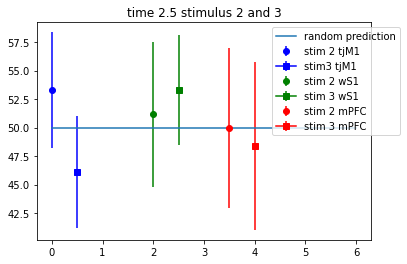

In [59]:
x=0 #time interval 2.5 s across different brain areas for stimulus 2 and 3 with hyper-parameters tuned separately on stimulus 2 and 3
x1=0.5
x2=1
x3=2
x4=2.5
x5=3.5
x6=4
x7=4
x8=5
x9=5.5
x10=6
x11=6.5
X0=np.linspace(0,6,100)
y0=50*np.ones(100)


plt.errorbar(x, deep_acc_stim2_tjM1[2,0], deep_acc_stim2_tjM1[2,1], fmt='o', color= 'b', label='stim 2 tjM1') #orange
plt.errorbar(x1, deep_acc_stim3_tjM1[2,0], deep_acc_stim3_tjM1[2,1], marker='s',color='b', label='stim3 tjM1') #green
plt.plot(X0,y0, label='random prediction')
plt.errorbar(x3,deep_acc_stim2_ws1[2,0], deep_acc_stim2_ws1[2,1], fmt='o', color= 'g', label='stim 2 wS1')
plt.errorbar(x4,deep_acc_stim3_ws1[2,0], deep_acc_stim3_ws1[2,1], marker ='s', color= 'g', label='stim 3 wS1')
plt.errorbar(x5, deep_acc_stim2_mPFC[2,0], deep_acc_stim2_mPFC[2,1], fmt='o', color='r', label='stim 2 mPFC')
plt.errorbar(x6, deep_acc_stim3_mPFC[2,0], deep_acc_stim3_mPFC[2,1], marker = 's', color='r', label='stim 3 mPFC')
plt.legend()
plt.title('time 2.5 stimulus 2 and 3')
plt.legend(loc=1,bbox_to_anchor=(0.85, 0.75, 0.25, 0.25))

# Analysis per session


We try to analyze separately the different sessions because putting them together we don't account for some biological factors but we see that doing like that we have a very small amount of data

In [66]:
ws1=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,21,23]) #we select the session in which ws1 is recorded
ws1_mod=np.array([0,1,2,3,4,5,6,7,9,10,11,12,15,16,17,18,19,21,23]) #previous selection to take out smaller samples
ws1_mod2=np.array([0,2,3,5,6,9,10,12,15,16,17,19,23]) # I select only the session with enough trials

In [65]:
for i in range(len(ws1_mod)):
  X,y=preprocess_dataset_with_session(data_path, 'wS1', start=0.5, select_amplitude=[2])[ws1_mod[i]]
  print('session', ws1_mod[i], ' - amplitude 2', '  dimesion', y.shape)
  X1,y1 =X,y=preprocess_dataset_with_session(data_path, 'wS1', start=0.5, select_amplitude=[3])[ws1_mod[i]]
  print('session', ws1_mod[i], ' - amplitude 3', 'dimesion', y.shape)


session 0  - amplitude 2   dimesion (58,)
session 0  - amplitude 3 dimesion (26,)
session 1  - amplitude 2   dimesion (26,)
session 1  - amplitude 3 dimesion (16,)
session 2  - amplitude 2   dimesion (30,)
session 2  - amplitude 3 dimesion (28,)
session 3  - amplitude 2   dimesion (54,)
session 3  - amplitude 3 dimesion (22,)
session 4  - amplitude 2   dimesion (20,)
session 4  - amplitude 3 dimesion (44,)
session 5  - amplitude 2   dimesion (24,)
session 5  - amplitude 3 dimesion (66,)
session 6  - amplitude 2   dimesion (24,)
session 6  - amplitude 3 dimesion (64,)
session 7  - amplitude 2   dimesion (10,)
session 7  - amplitude 3 dimesion (52,)
session 9  - amplitude 2   dimesion (30,)
session 9  - amplitude 3 dimesion (34,)
session 10  - amplitude 2   dimesion (40,)
session 10  - amplitude 3 dimesion (52,)
session 11  - amplitude 2   dimesion (40,)
session 11  - amplitude 3 dimesion (20,)
session 12  - amplitude 2   dimesion (54,)
session 12  - amplitude 3 dimesion (52,)
session 15

In [69]:
#brain area ws1
time1_acc_mod_ws1_session=np.zeros((len(ws1_mod2), 2)) #contains the mean accuracy and standard deviation for each session considering stimulus amplitude 2 and 3 together and the added feature at pre-stimulus time 1.5 s
time1_acc2_ws1_session=np.zeros((len(ws1_mod2),2)) #contains the mean accuracy and standard deviation for each session considering stimulus amplitude 2 at pre-stimulus time 1.5 s
time1_acc3_ws1_session=np.zeros((len(ws1_mod2),2)) #contains the mean accuracy and standard deviation for each session considering stimulus amplitude 3 at pre-stimulus time 1.5 s
time1_acc_ws1_session=np.zeros((len(ws1_mod2),2)) ##contains the mean accuracy and standard deviation for each session considering stimulus amplitude 2 and 3 together at pre-stimulus time 1.5 s
for i in range(len(ws1_mod2)):
      time1_acc_mod_ws1_session[i, :], time1_acc2_ws1_session[i, :], time1_acc3_ws1_session[i,:], time1_acc_ws1_session[i, :]=model_CV(data_path, ws1_mod2[i], 1.5, clf_ws1, clf_ws1, clf_ws1, clf_ws1, 'wS1')
    

**********************************
session  0 time  1.5
added feature
The cross validated score is: 0.5056 the crossvalidation standard deviation is  0.1536
stimulus 2
The cross validated score is: 0.5667 the crossvalidation standard deviation is  0.2049
stimulus 3
The cross validated score is: 0.4667 the crossvalidation standard deviation is  0.2963
accuracy per session stim 2 and 3 together
The cross validated score is: 0.5458 the crossvalidation standard deviation is  0.175
**********************************
session  2 time  1.5
added feature
The cross validated score is: 0.57 the crossvalidation standard deviation is  0.2203
stimulus 2
The cross validated score is: 0.3333 the crossvalidation standard deviation is  0.2582
stimulus 3
The cross validated score is: 0.45 the crossvalidation standard deviation is  0.2986
accuracy per session stim 2 and 3 together
The cross validated score is: 0.5667 the crossvalidation standard deviation is  0.1406
**********************************
sess

In [70]:
#calculate the mean accuracy across all sessions and the standard deviation
time1_mean_acc_mod_ws1_session=np.mean(time1_acc_mod_ws1_session[:,0],0)
time1_std_acc_mod_ws1_session=np.std(time1_acc_mod_ws1_session[:,0],0)
time1_mean_acc2_ws1_session=np.mean(time1_acc2_ws1_session[:,0],0)
time1_std_acc2_ws1_session=np.std(time1_acc2_ws1_session[:,0],0)
time1_mean_acc3_ws1_session=np.mean(time1_acc3_ws1_session[:,0],0)
time1_std_acc3_ws1_session=np.std(time1_acc3_ws1_session[:,0],0)
time1_mean_acc_ws1_session=np.mean(time1_acc_ws1_session[:,0],0)
time1_std_acc_ws1_session=np.std(time1_acc_ws1_session[:,0],0)
print(time1_mean_acc_mod_ws1_session, time1_std_acc_mod_ws1_session)
print(time1_mean_acc2_ws1_session, time1_std_acc2_ws1_session)
print(time1_mean_acc3_ws1_session, time1_std_acc3_ws1_session)
print(time1_mean_acc2_ws1_session, time1_std_acc_ws1_session)

49.400769230769235 7.5817406784970105
50.28076923076923 12.106685032873658
52.309230769230766 10.132433424434216
50.28076923076923 6.855985162205262


In [72]:
mPFC=np.array([9,10,12,13,14,15,17,23,22,21,20,19]) # we analyze mPFC area
mPFC_mod=np.array([9,10,12,13,14,15,17,23,21,20,19]) #we take out the session with less tests

In [73]:
for i in range(len(mPFC)):
  X,y=preprocess_dataset_with_session(data_path, 'mPFC', start=0.5, select_amplitude=[3])[mPFC[i]]
  print(y.shape)

(34,)
(52,)
(52,)
(34,)
(64,)
(58,)
(26,)
(64,)
(6,)
(24,)
(52,)
(96,)


In [76]:
time1_acc_mod_mPFC_session=np.zeros((len(mPFC_mod),2))
time1_acc2_mPFC_session=np.zeros((len(mPFC_mod),2))
time1_acc3_mPFC_session=np.zeros((len(mPFC_mod),2))
time1_acc_mPFC_session=np.zeros((len(mPFC_mod),2))

In [77]:
for i in range(len(mPFC_mod)):
    time1_acc_mod_mPFC_session[i,:], time1_acc2_mPFC_session[i,:], time1_acc3_mPFC_session[i,:], time1_acc_mPFC_session[i,:]=model_CV(data_path, mPFC_mod[i], 1.5, clf_mPFC, clf_stim2_mPFC, clf_stim3_mPFC, clf_mPFC, 'mPFC')

**********************************
session  9 time  1.5
added feature
The cross validated score is: 0.4095 the crossvalidation standard deviation is  0.1367
stimulus 2
The cross validated score is: 0.5333 the crossvalidation standard deviation is  0.3055
stimulus 3
The cross validated score is: 0.1417 the crossvalidation standard deviation is  0.1828
accuracy per session stim 2 and 3 together
The cross validated score is: 0.6 the crossvalidation standard deviation is  0.1212
**********************************
session  10 time  1.5
added feature
The cross validated score is: 0.6178 the crossvalidation standard deviation is  0.1068
stimulus 2
The cross validated score is: 0.55 the crossvalidation standard deviation is  0.2449
stimulus 3
The cross validated score is: 0.5767 the crossvalidation standard deviation is  0.1446
accuracy per session stim 2 and 3 together
The cross validated score is: 0.6411 the crossvalidation standard deviation is  0.2043
**********************************
ses

In [78]:
time1_mean_acc_mod_mPFC_session=np.mean(time1_acc_mod_mPFC_session[:,0],0)
time1_std_acc_mod_mPFC_session=np.std(time1_acc_mod_mPFC_session[:,0],0)
print(time1_mean_acc_mod_mPFC_session, time1_std_acc_mod_mPFC_session)
time1_mean_acc2_mPFC_session=np.mean(time1_acc2_mPFC_session[:,0],0)
time1_std_acc2_mPFC_session=np.std(time1_acc2_mPFC_session[:,0],0)
print(time1_mean_acc2_mPFC_session, time1_std_acc2_mPFC_session)
time1_mean_acc3_mPFC_session=np.mean(time1_acc3_mPFC_session[:,0],0)
time1_std_acc3_mPFC_session=np.std(time1_acc3_mPFC_session[:,0],0)
print(time1_mean_acc3_mPFC_session, time1_std_acc3_mPFC_session)
time1_mean_acc_mPFC_session=np.mean(time1_acc_mPFC_session[:,0],0)
time1_std_acc_mPFC_session=np.std(time1_acc_mPFC_session[:,0],0)
print(time1_mean_acc_mPFC_session,time1_std_acc_mPFC_session)

53.06636363636364 9.421299150645329
52.35818181818181 8.351861869919478
51.33818181818182 14.989911648828
54.276363636363634 7.450922179322104


In [83]:
tjM1=np.array([13,14,16,18,20,22])
tjM1_mod=np.array([13,14,16,18,20])

In [81]:
for i in range(len(tjM1)):
  X,y=preprocess_dataset_with_session(data_path, 'tjM1', start=0.5, select_amplitude=[3])[tjM1[i]]
  print(y.shape, ' session ', tjM1[i])
  X1,y1=preprocess_dataset_with_session(data_path, 'tjM1', start=0.5, select_amplitude=[2])[tjM1[i]]
  print(y1.shape, ' session ', tjM1[i])

(34,)  session  13
(44,)  session  13
(64,)  session  14
(50,)  session  14
(62,)  session  16
(44,)  session  16
(46,)  session  18
(22,)  session  18
(52,)  session  20
(34,)  session  20
(6,)  session  22
(32,)  session  22


In [84]:
time1_acc_mod_tjM1_session=np.zeros((len(tjM1_mod),2))
time1_acc2_tjM1_session=np.zeros((len(tjM1_mod),2))
time1_acc3_tjM1_session=np.zeros((len(tjM1_mod),2))
time1_acc_tjM1_session=np.zeros((len(tjM1_mod),2))

In [85]:
for i in range(len(tjM1_mod)):
    time1_acc_mod_tjM1_session[i,:], time1_acc2_tjM1_session[i,:], time1_acc3_tjM1_session[i,:], time1_acc_tjM1_session[i,:]=model_CV(data_path, tjM1_mod[i], 1.5, clf_tjM1, clf_tjM1, clf_tjM1, clf_tjM1, 'tjM1')

**********************************
session  13 time  1.5
added feature
The cross validated score is: 0.4893 the crossvalidation standard deviation is  0.1509
stimulus 2
The cross validated score is: 0.38 the crossvalidation standard deviation is  0.2076
stimulus 3
The cross validated score is: 0.5333 the crossvalidation standard deviation is  0.1675
accuracy per session stim 2 and 3 together
The cross validated score is: 0.53 the crossvalidation standard deviation is  0.064
**********************************
session  14 time  1.5
added feature
The cross validated score is: 0.5333 the crossvalidation standard deviation is  0.0771
stimulus 2
The cross validated score is: 0.52 the crossvalidation standard deviation is  0.16
stimulus 3
The cross validated score is: 0.4095 the crossvalidation standard deviation is  0.188
accuracy per session stim 2 and 3 together
The cross validated score is: 0.4826 the crossvalidation standard deviation is  0.1149
**********************************
session

In [86]:
time1_mean_acc_mod_tjM1_session=np.mean(time1_acc_mod_tjM1_session[:,0],0)
time1_std_acc_mod_tjM1_session=np.std(time1_acc_mod_tjM1_session[:,0],0)
print(time1_mean_acc_mod_tjM1_session, time1_std_acc_mod_tjM1_session)
time1_mean_acc2_tjM1_session=np.mean(time1_acc2_tjM1_session[:,0],0)
time1_std_acc2_tjM1_session=np.std(time1_acc2_tjM1_session[:,0],0)
print(time1_mean_acc2_tjM1_session, time1_std_acc2_tjM1_session)
time1_mean_acc3_tjM1_session=np.mean(time1_acc3_tjM1_session[:,0],0)
time1_std_acc3_tjM1_session=np.std(time1_acc3_tjM1_session[:,0],0)
print(time1_mean_acc3_tjM1_session, time1_std_acc3_tjM1_session)
time1_mean_acc_tjM1_session=np.mean(time1_acc_tjM1_session[:,0],0)
time1_std_acc_tjM1_session=np.std(time1_acc_tjM1_session[:,0],0)
print(time1_mean_acc_tjM1_session,time1_std_acc_tjM1_session)

51.294000000000004 3.118670229440747
44.034000000000006 12.621989700518695
55.041999999999994 8.068103618571094
52.94200000000001 5.929328461132847


Text(0.5, 1.0, 'time 1.5 stimulus 2 and 3 mean accuracy across sessions')

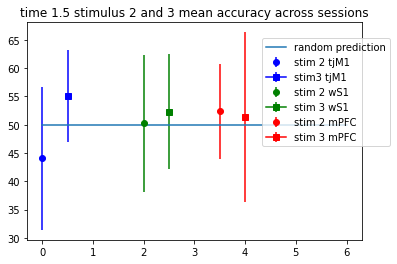

In [87]:
x=0
x1=0.5
x2=1
x3=2
x4=2.5
x5=3.5
x6=4
x7=4
x8=5
x9=5.5
x10=6
x11=6.5
X0=np.linspace(0,6,100)
y0=50*np.ones(100)

#plt.errorbar(x, time0_mod_tjM1[0], mod_tjM1_tot[1], fmt='*', color = 'b', label='tjM1') #blue
plt.errorbar(x, time1_mean_acc2_tjM1_session, time1_std_acc2_tjM1_session, fmt='o', color= 'b', label='stim 2 tjM1') #orange
plt.errorbar(x1, time1_mean_acc3_tjM1_session, time1_std_acc3_tjM1_session, marker='s',color='b', label='stim3 tjM1') #green
#plt.errorbar(x3, time0_tjM1[0], tjM1_tot[1], fmt='*',color='b') #red
plt.plot(X0,y0, label='random prediction')
plt.errorbar(x3,time1_mean_acc2_ws1_session, time1_std_acc2_ws1_session, fmt='o', color= 'g', label='stim 2 wS1')
plt.errorbar(x4,time1_mean_acc3_ws1_session, time1_std_acc3_ws1_session, marker ='s', color= 'g', label='stim 3 wS1')
plt.errorbar(x5,time1_mean_acc2_mPFC_session, time1_std_acc2_mPFC_session, fmt='o', color='r', label='stim 2 mPFC')
plt.errorbar(x6, time1_mean_acc3_mPFC_session, time1_std_acc3_mPFC_session, marker = 's', color='r', label='stim 3 mPFC')
plt.legend()
plt.legend(loc=1,bbox_to_anchor=(0.85, 0.7, 0.25, 0.25))
plt.title('time 1.5 stimulus 2 and 3 mean accuracy across sessions')